# Analysis of Housing Data

**Goal:** Ultimately the goal of this data analysis project is to create a regression model that accurately depicts home prices based on house characteristics. 
<br> <u>Subtasks</u>:
<br> &emsp; 1. Showcase and expand my knowledge of the seaborn package.

In [3]:
__author__ = "Neal Kapur"
import pandas as pd 
import sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import warnings 

In [4]:
df = pd.read_csv("/Users/nealk/DataScience/data_analytics/data/housing_data.csv")

## Data Cleaning

In [5]:
df.date = pd.to_datetime(df.date) # Convert the date column to the correct format
# Change the format of statezip column

Seperate the state and zip code data in the dataframe

In [6]:

df['state'] = df.statezip.str.split(' ', expand = True)[0]
df['zip'] = df.statezip.str.split(' ', expand = True)[1]
df = df.drop(columns = ['statezip'], axis=1)

In [7]:
df = df.astype({'street': 'string', 'city': 'string', 'country': 'string', 'state': 'string', 'zip': 'int'})

Create Indicator Columns
For: Renovation, Basement

In [8]:
df['is_renovated'] = np.where(df['yr_renovated'] > 0, 'Yes', 'No')
df['has_basement'] = np.where(df['sqft_basement'] > 0, 'Yes', 'No')

In [9]:
list(df.columns)

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'country',
 'state',
 'zip',
 'is_renovated',
 'has_basement']

## EDA 

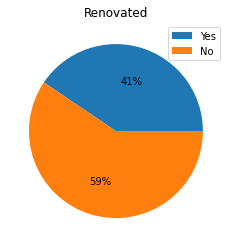

In [10]:
# Seaborn plot works but want to diversify plot type in my Jupyter notebook
# sns.countplot(data=df, x='is_renovated')

data = df.is_renovated.value_counts().sort_index(ascending = False) # Sorted Index so that Yes is the first label shown
plt.pie(data.values, autopct = '%1.0f%%')
plt.legend(labels= data.index)
plt.title('Renovated')
plt.show()

<AxesSubplot:xlabel='is_renovated', ylabel='count'>

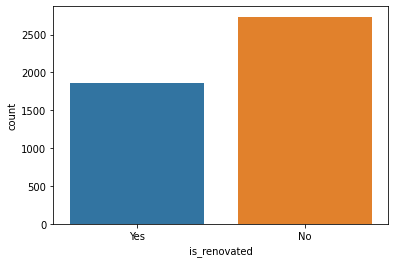

In [11]:
sns.countplot(data=df, x='is_renovated')

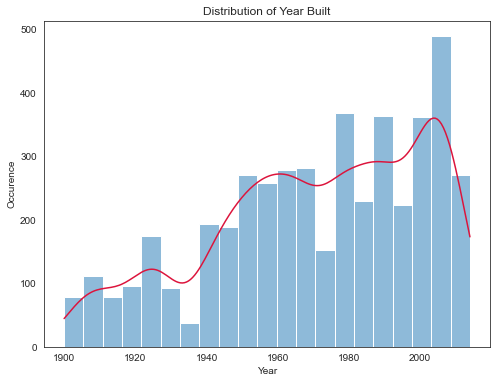

In [12]:
matplotlib.rcParams['figure.figsize'] = [8, 6]
sns.set_style(style='white') 
ax = sns.histplot(data = df, x = 'yr_built', kde = True, color = '#1f77b4')
ax.lines[0].set_color('crimson')
plt.xlabel('Year')
plt.ylabel('Occurence')
plt.title('Distribution of Year Built')
plt.show()

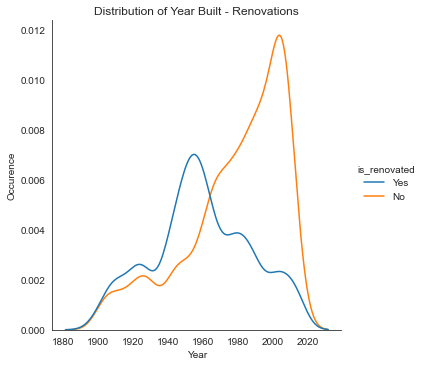

In [13]:
matplotlib.rcParams['figure.figsize'] = [8, 6]
sns.displot(data = df, x = 'yr_built', kind = 'kde', color = 'blue', hue='is_renovated')
plt.xlabel('Year')
plt.ylabel('Occurence')
plt.title('Distribution of Year Built - Renovations')
plt.show()

**Distribution of Year Built:** The two plots depict the distribution of houses based on their year built, with one plot showing all houses and the other distinguishing between renovated and non-renovated houses. The analysis indicates that non-renovated houses, on average, tend to have been built more recently compared to renovated houses.

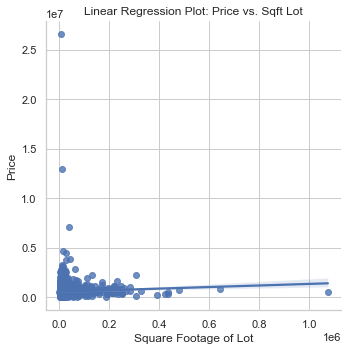

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # Set the style of the plot

# Create a linear regression plot
sns.lmplot(x='sqft_lot', y='price', data=df)

plt.xlabel('Square Footage of Lot')
plt.ylabel('Price')
plt.title('Linear Regression Plot: Price vs. Sqft Lot')

plt.show()